# Importing the necessary modules

In [ ]:
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, BatchNormalization , Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import classification_report

In [ ]:
import pandas as pd

dataframe1 = pd.read_csv('/content/features_30_sec.csv')
dataframe2 = pd.read_csv('/content/features_3_sec.csv')

In [ ]:
dataframe1
dataframe2

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


In [ ]:
dataframe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

In [ ]:
dataframe2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [ ]:
print(f"Number of duplicate rows: {dataframe1.duplicated().sum()}")
dataframe1 = dataframe1.drop_duplicates()

print("Missing values per column:")
print(dataframe1.isnull().sum())

# Handling missing values
# Option 1: Impute missing values with mean (for numeric columns)
numeric_columns = dataframe1.select_dtypes(include=[np.number]).columns

# Option 2: Drop rows with missing values (if missing data is minimal)
dataframe1.dropna(inplace=True)

Number of duplicate rows: 0
Missing values per column:
filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var        

In [ ]:
print(f"Number of duplicate rows: {dataframe2.duplicated().sum()}")
dataframe2 = dataframe2.drop_duplicates()

print("Missing values per column:")
print(dataframe2.isnull().sum())

# Handling missing values
# Option 1: Impute missing values with mean (for numeric columns)
numeric_columns = dataframe2.select_dtypes(include=[np.number]).columns

# Option 2: Drop rows with missing values (if missing data is minimal)
dataframe2.dropna(inplace=True)

Number of duplicate rows: 0
Missing values per column:
filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var        

# Data Exploration/ Data Visualization

In [ ]:
def plot_waveform(path, num_rows=2, num_cols=5):
    folders = [folder for folder in os.listdir(path) if os.path.isdir(os.path.join(path, folder))]
    total_subplots = num_rows * num_cols
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 6))

    for i, folder in enumerate(folders):
        if i >= total_subplots:
            break

        folder_path = os.path.join(path, folder)
        audio_files = [file for file in os.listdir(folder_path) if file.endswith('.wav')]

        for j, file in enumerate(audio_files):
            print(file)
            if j >= num_cols:
                break

            file_path = os.path.join(folder_path, file)
            audio, sr = librosa.load(file_path)
            row = i // num_cols
            col = i % num_cols
            plot = librosa.display.waveshow(audio, sr=sr, ax=axs[row, col])
            axs[row, col].set_title(f'{folder}')

    plt.tight_layout()
    fig.suptitle("Waveforms")
    fig.subplots_adjust(top=0.90)
    plt.savefig('waveforms_for_audio_files.png', dpi=300)
    plt.show()


In [ ]:
directory_path = '/content/drive/Othercomputers/My Computer/Desktop/genres_original'
dataframe1

classical.00000.wav
classical.00001.wav
classical.00002.wav
classical.00003.wav
classical.00004.wav
classical.00005.wav
country.00000.wav
country.00001.wav
country.00002.wav
country.00003.wav
country.00004.wav
country.00005.wav
disco.00000.wav
disco.00001.wav
disco.00002.wav
disco.00003.wav
disco.00004.wav
disco.00005.wav
hiphop.00000.wav
hiphop.00001.wav
hiphop.00002.wav
hiphop.00003.wav
hiphop.00004.wav
hiphop.00005.wav
jazz.00000.wav
jazz.00001.wav
jazz.00002.wav
jazz.00003.wav
jazz.00004.wav
jazz.00005.wav
metal.00000.wav
metal.00001.wav
metal.00002.wav
metal.00003.wav
metal.00004.wav
metal.00005.wav
pop.00000.wav
pop.00001.wav
pop.00002.wav
pop.00003.wav
pop.00004.wav
pop.00005.wav
reggae.00000.wav
reggae.00001.wav
reggae.00002.wav
reggae.00003.wav
reggae.00004.wav
reggae.00005.wav
rock.00000.wav
rock.00001.wav
rock.00002.wav
rock.00003.wav
rock.00004.wav
rock.00005.wav


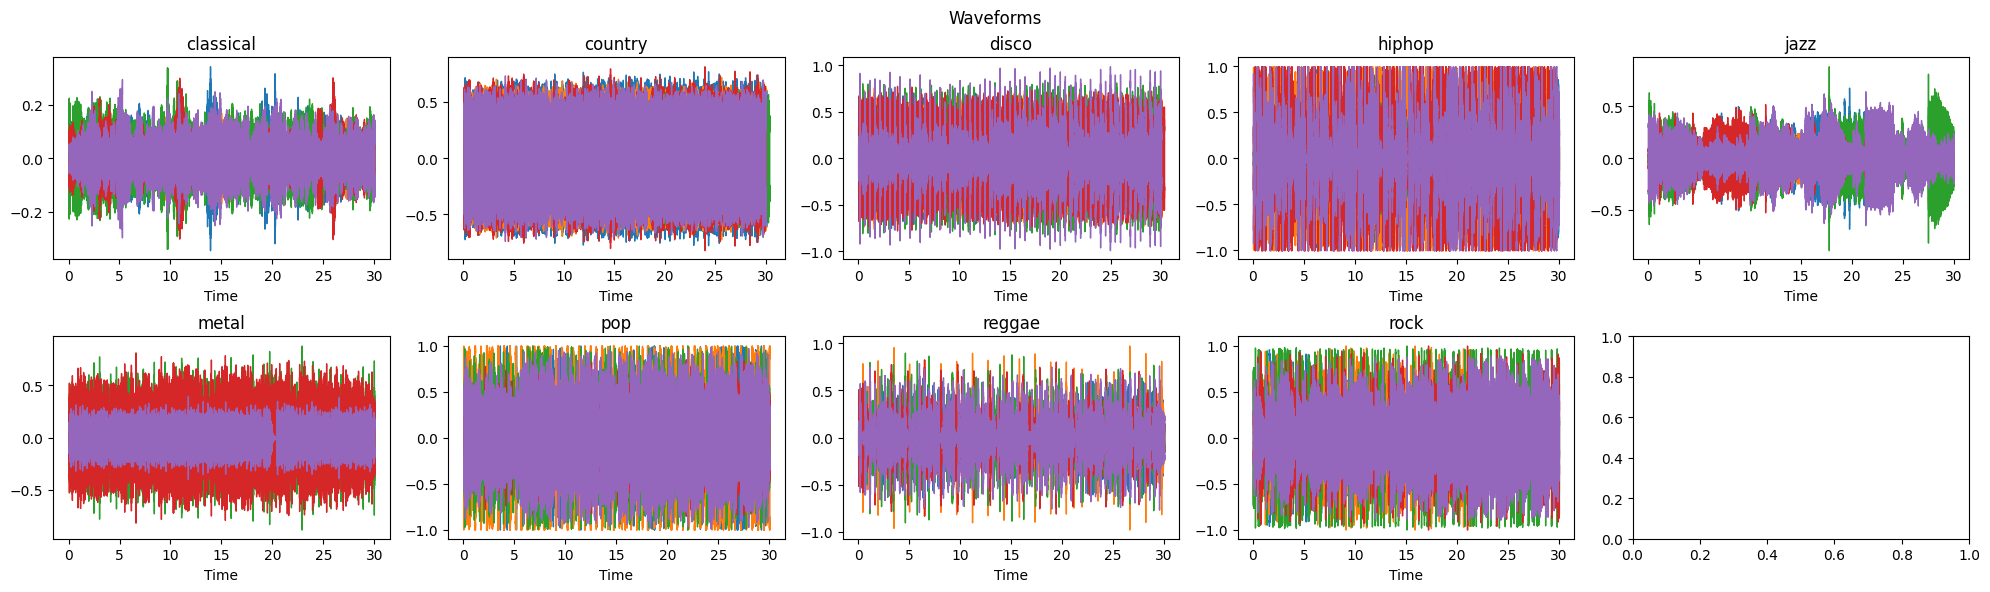

In [ ]:
plot_waveform(directory_path)

<ipython-input-16-e0e27c90c67a>:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


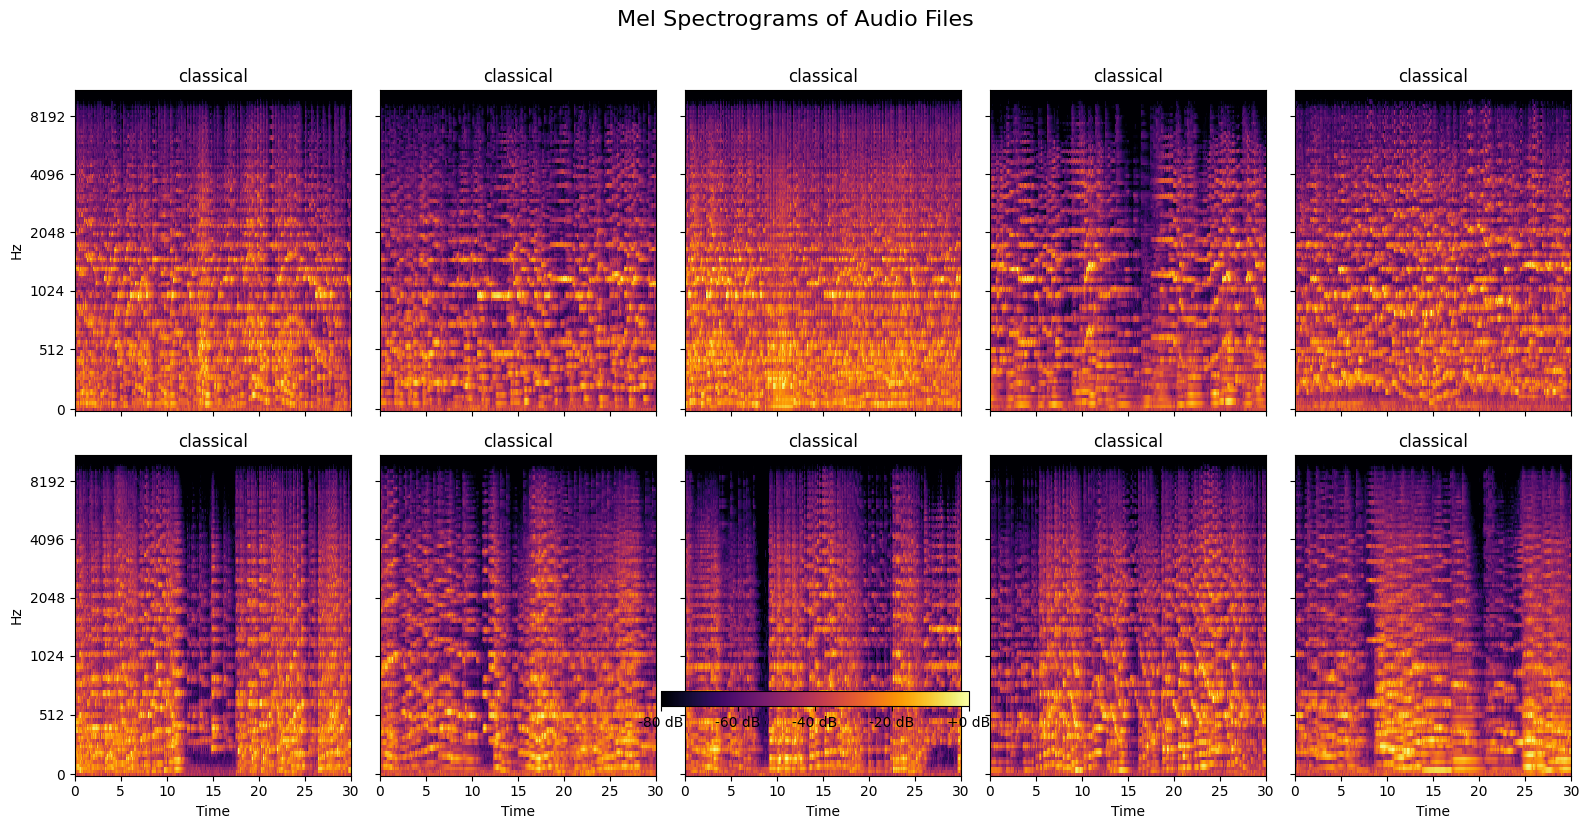

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def plot_mel_spectrogram(directory_path, num_rows=2, num_cols=5):
    # Get a list of folders in the given directory
    folders = [folder for folder in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, folder))]

    # Initialize the figure and axes for subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 8))
    subplot_idx = 0

    for folder in folders:
        folder_path = os.path.join(directory_path, folder)
        audio_files = [file for file in os.listdir(folder_path) if file.endswith('.wav')]

        for file in audio_files:
            if subplot_idx >= num_rows * num_cols:
                break  # Stop if we reach the maximum number of subplots

            # Load the audio file and compute the Mel spectrogram
            file_path = os.path.join(folder_path, file)
            audio, sr = librosa.load(file_path, sr=None)
            spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
            log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

            # Determine the row and column in the subplot grid
            row, col = divmod(subplot_idx, num_cols)

            # Plot the spectrogram
            img = librosa.display.specshow(log_spectrogram, sr=sr, ax=axs[row, col], x_axis='time', y_axis='mel', cmap='inferno')
            axs[row, col].set_title(folder)
            axs[row, col].label_outer()  # Hide x and y labels if not at the border

            subplot_idx += 1

    # Add a colorbar to the last image
    fig.colorbar(img, ax=axs, format='%+2.0f dB', orientation='horizontal', fraction=0.025, pad=0.04)

    # Adjust the layout and add a title
    plt.tight_layout()
    fig.suptitle("Mel Spectrograms of Audio Files", fontsize=16)
    plt.subplots_adjust(top=0.88)

    # Save and show the figure
    plt.savefig('mel_spectrograms_grid.png', dpi=300)
    plt.show()

# Example usage
plot_mel_spectrogram('/content/drive/Othercomputers/My Computer/Desktop/genres_original')


<ipython-input-16-7fc9bbeca6f1>:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


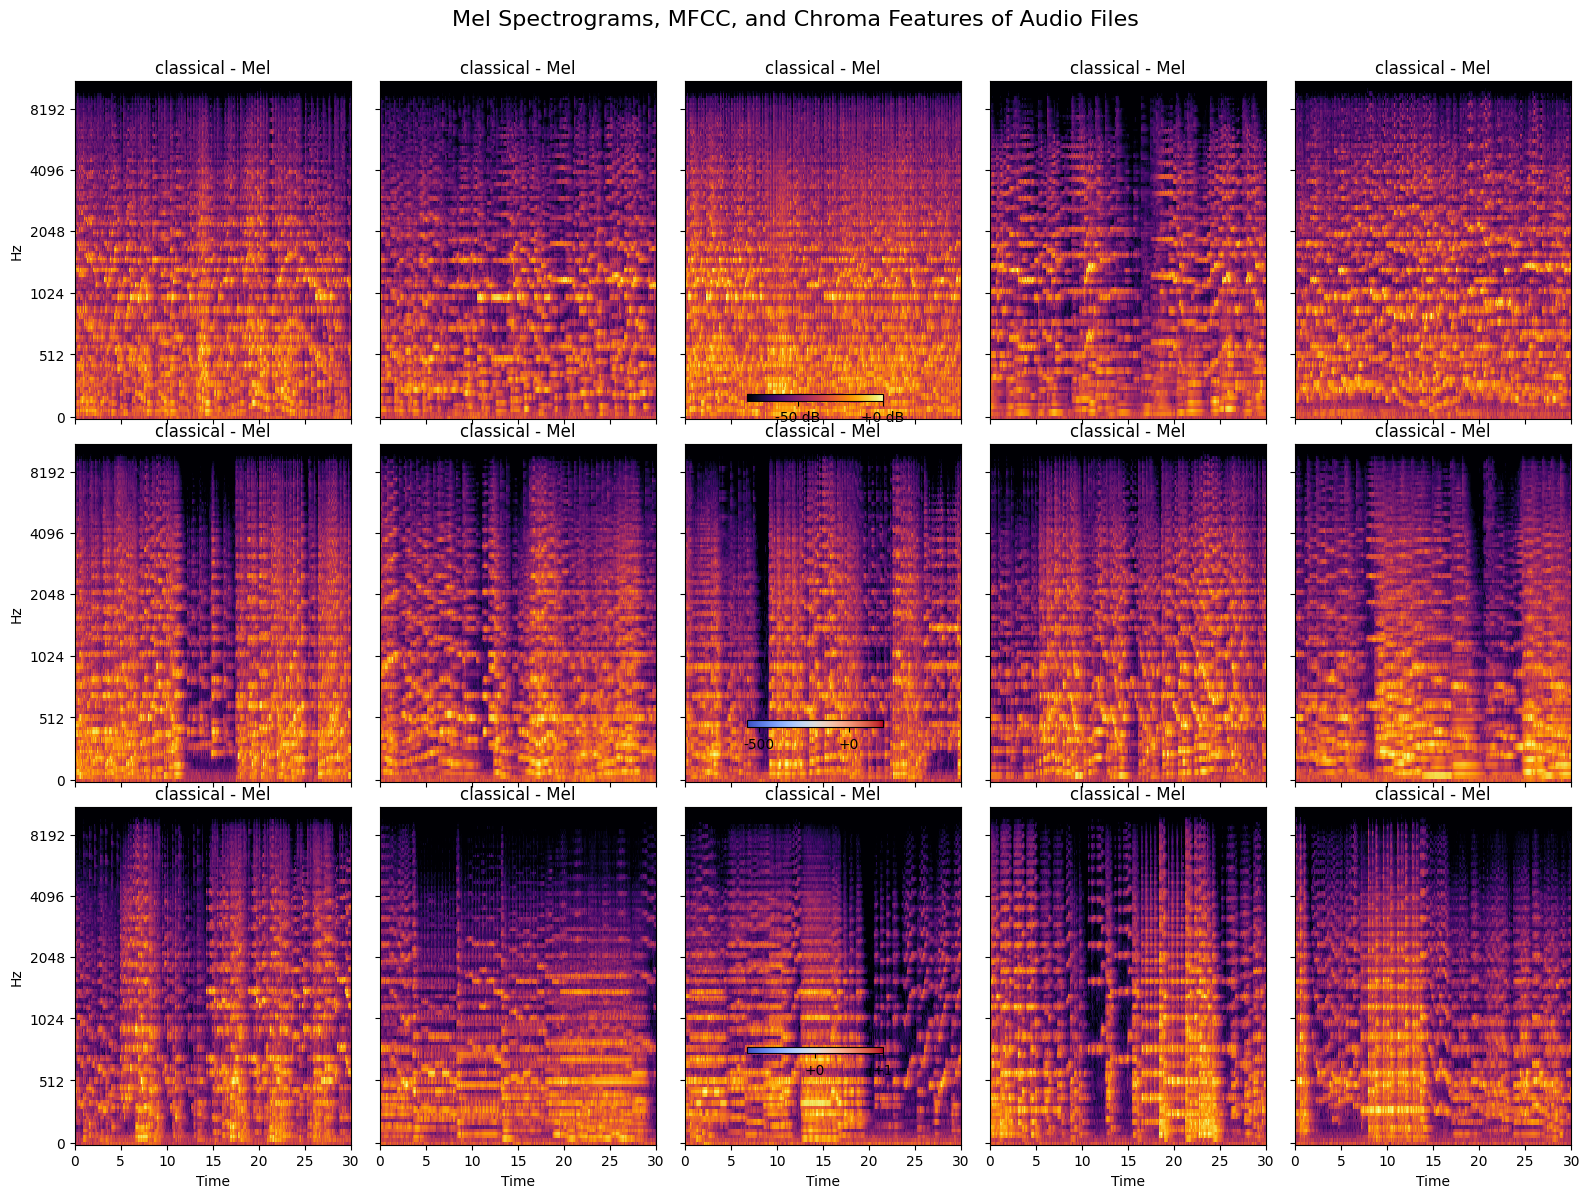

In [ ]:
def plot_audio_features(directory_path, num_rows=3, num_cols=5):
    # Get a list of folders in the given directory
    folders = [folder for folder in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, folder))]

    # Initialize the figure and axes for subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 12))
    subplot_idx = 0

    for folder in folders:
        folder_path = os.path.join(directory_path, folder)
        audio_files = [file for file in os.listdir(folder_path) if file.endswith('.wav')]

        for file in audio_files:
            if subplot_idx >= num_rows * num_cols:
                break  # Stop if we reach the maximum number of subplots

            # Load the audio file
            file_path = os.path.join(folder_path, file)
            audio, sr = librosa.load(file_path, sr=None)

            # Compute the Mel spectrogram, MFCC, and Chroma features
            mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
            log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
            mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
            chroma = librosa.feature.chroma_stft(y=audio, sr=sr)

            # Determine the row and column in the subplot grid
            row, col = divmod(subplot_idx, num_cols)

            # Plot the Mel spectrogram
            img1 = librosa.display.specshow(log_mel_spectrogram, sr=sr, ax=axs[row, col], x_axis='time', y_axis='mel', cmap='inferno')
            axs[row, col].set_title(f"{folder} - Mel")
            axs[row, col].label_outer()

            # Plot MFCC
            if row+1 < num_rows:
                img2 = librosa.display.specshow(mfcc, sr=sr, ax=axs[row+1, col], x_axis='time', cmap='coolwarm')
                axs[row+1, col].set_title(f"{folder} - MFCC")
                axs[row+1, col].label_outer()

            # Plot Chroma
            if row+2 < num_rows:
                img3 = librosa.display.specshow(chroma, sr=sr, ax=axs[row+2, col], x_axis='time', y_axis='chroma', cmap='coolwarm')
                axs[row+2, col].set_title(f"{folder} - Chroma")
                axs[row+2, col].label_outer()

            subplot_idx += 1

    # Add colorbars to the last images of each feature type
    fig.colorbar(img1, ax=axs[0, :], format='%+2.0f dB', orientation='horizontal', fraction=0.025, pad=0.04)
    fig.colorbar(img2, ax=axs[1, :], format='%+2.0f', orientation='horizontal', fraction=0.025, pad=0.04)
    fig.colorbar(img3, ax=axs[2, :], format='%+2.0f', orientation='horizontal', fraction=0.025, pad=0.04)

    # Adjust the layout and add a title
    plt.tight_layout()
    fig.suptitle("Mel Spectrograms, MFCC, and Chroma Features of Audio Files", fontsize=16)
    plt.subplots_adjust(top=0.92)

    # Save and show the figure
    plt.savefig('audio_features_grid.png', dpi=300)
    plt.show()

# Example usage
plot_audio_features('/content/drive/Othercomputers/My Computer/Desktop/genres_original')

# Reading in the Data

In [ ]:
def load_data(file_path):
    try:
        with open(file_path) as file:
            data = json.load(file)
            mel_spectrograms = data['mel_spectrograms']
            targets = data['targets']
        return mel_spectrograms, targets
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e.msg} at line {e.lineno}, column {e.colno}")


In [ ]:
file_path = "extracted_features.json"
try:
    X, y = load_data(file_path)
except FileNotFoundError:
    print("File not found!")

File not found!


In [ ]:
import os
import librosa
import numpy as np

def extract_mel_spectrogram(file_path, n_mels=128):
    try:
        # Load the audio file
        audio, sr = librosa.load(file_path, sr=None)

        # Extract Mel spectrogram
        mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels)

        # Convert to log scale (dB)
        log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

        # Ensure the spectrogram is not empty
        if log_mel_spectrogram.size == 0:
            raise ValueError(f"Empty feature array extracted from file: {file_path}")

        return log_mel_spectrogram

    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Example usage
audio_directory = '/content/drive/Othercomputers/My Computer/Desktop/genres_original'
for file in os.listdir(audio_directory):
    if file.endswith('.wav'):
        file_path = os.path.join(audio_directory, file)
        features = extract_mel_spectrogram(file_path)  # features should be defined here

        if features is not None:  # Check if features is successfully extracted
            print(f"Features extracted for {file}: {features.shape}")
            print(features)  # Print the actual feature array
        else:
            print(f"Failed to extract features for {file}.")

# preparing the data to passed to the model

In [ ]:
def prepare_data(X, y, test_size=0.1, validation_size=0.1):
    # Splitting the data into test and train sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # Splitting the training set into training and validation datasets
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # Adding a new axis to the numpy arrays to make them 4D arrays
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize data (0-255 to 0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    validation_data=(x_test, y_test),
                    epochs=100,
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 110s 137ms/step - accuracy: 0.2549 - loss: 2.0549 - val_accuracy: 0.4817 - val_loss: 1.4509 - learning_rate: 0.0010
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 108s 137ms/step - accuracy: 0.4536 - loss: 1.5566 - val_accuracy: 0.5299 - val_loss: 1.3537 - learning_rate: 0.0010
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 112s 143ms/step - accuracy: 0.5100 - loss: 1.4240 - val_accuracy: 0.5854 - val_loss: 1.1921 - learning_rate: 0.0010
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 110s 141ms/step - accuracy: 0.5468 - loss: 1.3275 - val_accuracy: 0.5998 - val_loss: 1.1794 - learning_rate: 0.0010
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 105s 134ms/step - accuracy: 0.5774 - loss: 1.2525 - val_accuracy: 0.6324 - val_loss: 1.1084 - learning_rate: 0.0010
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 105s 134ms/step - accuracy: 0.5953 - loss: 1.2116 - val_accuracy: 0.6443 - val_loss: 1.0620 - learning_rate: 0.0010
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 133ms/step - accuracy: 0

In [ ]:
from tensorflow.keras.layers import Dropout

model = tf.keras.Sequential([
    # Other layers...
    tf.keras.layers.Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout layer with 50% dropout rate
    tf.keras.layers.Dense(64, activation='relu'),
    Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
from tensorflow.keras.regularizers import l2

model = tf.keras.Sequential([
    # Other layers...
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluate the model on test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", cm)

# Classification report
cr = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", cr)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
Confusion Matrix:
 [[853  15  15   6   9   1   3  16  33  49]
 [  8 905   1   1   0   1   5   1   8  70]
 [ 87   7 627  36  60  42  73  42   5  21]
 [ 25  11  60 563  55 102  91  52  12  29]
 [ 17   5  35  29 758  10  49  87   4   6]
 [  9   4  29 127  39 648  32  85   6  21]
 [  8   1  29  24  15   6 892  12   6   7]
 [ 17   5  14  16  27  23   6 882   0  10]
 [ 59  32   2   5   2   0   3   5 850  42]
 [ 16  43   3   3   2   1   6   9  11 906]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81      1000
           1       0.88      0.91      0.89      1000
           2       0.77      0.63      0.69      1000
           3       0.70      0.56      0.62      1000
           4       0.78      0.76      0.77      1000
           5       0.78      0.65      0.71      1000
           6       0.77      0.89      0.83      1000
           7       0.74      0.88      0.81      10

In [ ]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split

def extract_mel_spectrogram(file_path, n_mels=128, fixed_length=128):
    try:
        audio, sr = librosa.load(file_path, sr=None)
        mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels)
        log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

        # Ensure the spectrogram is not empty
        if log_mel_spectrogram.size == 0:
            raise ValueError(f"Empty feature array extracted from file: {file_path}")

        # Pad or truncate the spectrogram to the fixed length
        if log_mel_spectrogram.shape[1] < fixed_length:
            # Pad with zeros
            pad_width = fixed_length - log_mel_spectrogram.shape[1]
            log_mel_spectrogram = np.pad(log_mel_spectrogram, ((0, 0), (0, pad_width)), mode='constant')
        else:
            # Truncate the spectrogram
            log_mel_spectrogram = log_mel_spectrogram[:, :fixed_length]

        return log_mel_spectrogram

    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Example usage
audio_directory = '/content/drive/Othercomputers/My Computer/Desktop/genres_original'
X = []
y = []

# Assuming you have a folder for each genre or label
for genre in os.listdir(audio_directory):
    genre_path = os.path.join(audio_directory, genre)
    if os.path.isdir(genre_path):  # Only process directories
        for file in os.listdir(genre_path):
            if file.endswith('.wav'):
                file_path = os.path.join(genre_path, file)
                features = extract_mel_spectrogram(file_path)
                if features is not None:
                    X.append(features.flatten())  # Flatten the spectrogram for ML algorithms
                    y.append(genre)  # The genre or label

# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Check if X and y are not empty
if X.size == 0 or y.size == 0:
    raise ValueError("The feature matrix X or labels y are empty.")

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_validation.shape, y_validation.shape)
print("Test set:", X_test.shape, y_test.shape)

<ipython-input-19-fce503a89b59>:8: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing /content/drive/Othercomputers/My Computer/Desktop/genres_original/jazz/jazz.00054.wav: 
Training set: (532, 16384) (532,)
Validation set: (178, 16384) (178,)
Test set: (178, 16384) (178,)


# Creating the CNN model

In [ ]:
def cnn_model(input_shape):
    # Create the model
    neural_network = Sequential()

    # Create the 1st Convolutional Layer
    neural_network.add(Conv2D(32, (2, 2), activation='relu', input_shape=input_shape))
    neural_network.add(MaxPool2D((2, 2), strides=(1, 1), padding='same'))
    neural_network.add(BatchNormalization())

    # Create the 2nd Convolutional Layer
    neural_network.add(Conv2D(64, (2, 2), activation='relu'))
    neural_network.add(MaxPool2D((2, 2), strides=(1, 1), padding='same'))
    neural_network.add(BatchNormalization())

    # Create the 3rd Convolutional Layer
    neural_network.add(Conv2D(32, (2, 2), activation='relu'))
    neural_network.add(MaxPool2D((2, 2), strides=(1, 1), padding='same'))
    neural_network.add(BatchNormalization())

    # Flatten the Output and feed it into a dense layer
    neural_network.add(Flatten())
    neural_network.add(Dense(64, activation='relu'))
    neural_network.add(Dropout(0.3))

    # Output layer
    neural_network.add(Dense(10, activation='softmax'))

    return neural_network


# Initiating the CNN model

In [ ]:
print("Shape of X_train:", X_train.shape)

Shape of X_train: (532, 16384)


In [ ]:
# Assuming the original spectrograms were of shape (n_mels, fixed_length)
height = 128  # n_mels (or whatever you used)
width = 128   # fixed_length (or whatever you used)

X_train = X_train.reshape(X_train.shape[0], height, width, 1)
X_validation = X_validation.reshape(X_validation.shape[0], height, width, 1)
X_test = X_test.reshape(X_test.shape[0], height, width, 1)

In [ ]:
# The input shape for the neural network
input_shape = (height, width, 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

# Example CNN model
def cnn_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))  # Assuming 10 classes

    return model

# Initialize the model
model = cnn_model(input_shape)

# Define the metrics
precision = Precision()
recall = Recall()

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', precision, recall])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Summary of the Model

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 127008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       8,128,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,129,546 (31.01 MB)

 Trainable params: 8,129,546 (31.01 MB)

 Non-trainable params: 0 (0.00 B)

# Training the Model

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Convert labels to integers
y_train = label_encoder.fit_transform(y_train)
y_validation = label_encoder.transform(y_validation)
y_test = label_encoder.transform(y_test)

In [ ]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)  # Assuming 10 classes
y_validation = to_categorical(y_validation, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
# Check data types
print("X_train dtype:", X_train.dtype)
print("y_train dtype:", y_train.dtype)

# Convert if necessary
X_train = X_train.astype('float32')
X_validation = X_validation.astype('float32')
X_test = X_test.astype('float32')

X_train dtype: float32
y_train dtype: float64


In [ ]:
# Assuming X_train, X_validation, and X_test are currently 2D
# Reshape to 4D: (batch_size, height, width, channels)

# For example, if your spectrograms are 128x128 pixels:
height = 128
width = 128

X_train = X_train.reshape((X_train.shape[0], height, width, 1))
X_validation = X_validation.reshape((X_validation.shape[0], height, width, 1))
X_test = X_test.reshape((X_test.shape[0], height, width, 1))

# Ensure the data type is float32
X_train = X_train.astype('float32')
X_validation = X_validation.astype('float32')
X_test = X_test.astype('float32')

# Verify the new shape
print("New X_train shape:", X_train.shape)

New X_train shape: (532, 128, 128, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

input_shape = (height, width, 1)
num_classes = y_train.shape[1]  # The number of classes
model = cnn_model(input_shape, num_classes)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
predictions = model.predict(X_test)
predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


In [ ]:
model.add(Dense(num_classes, activation='softmax'))

# Plotting the Performance of the CNN Neural Network

In [ ]:
!pip install pydot
!pip install graphviz

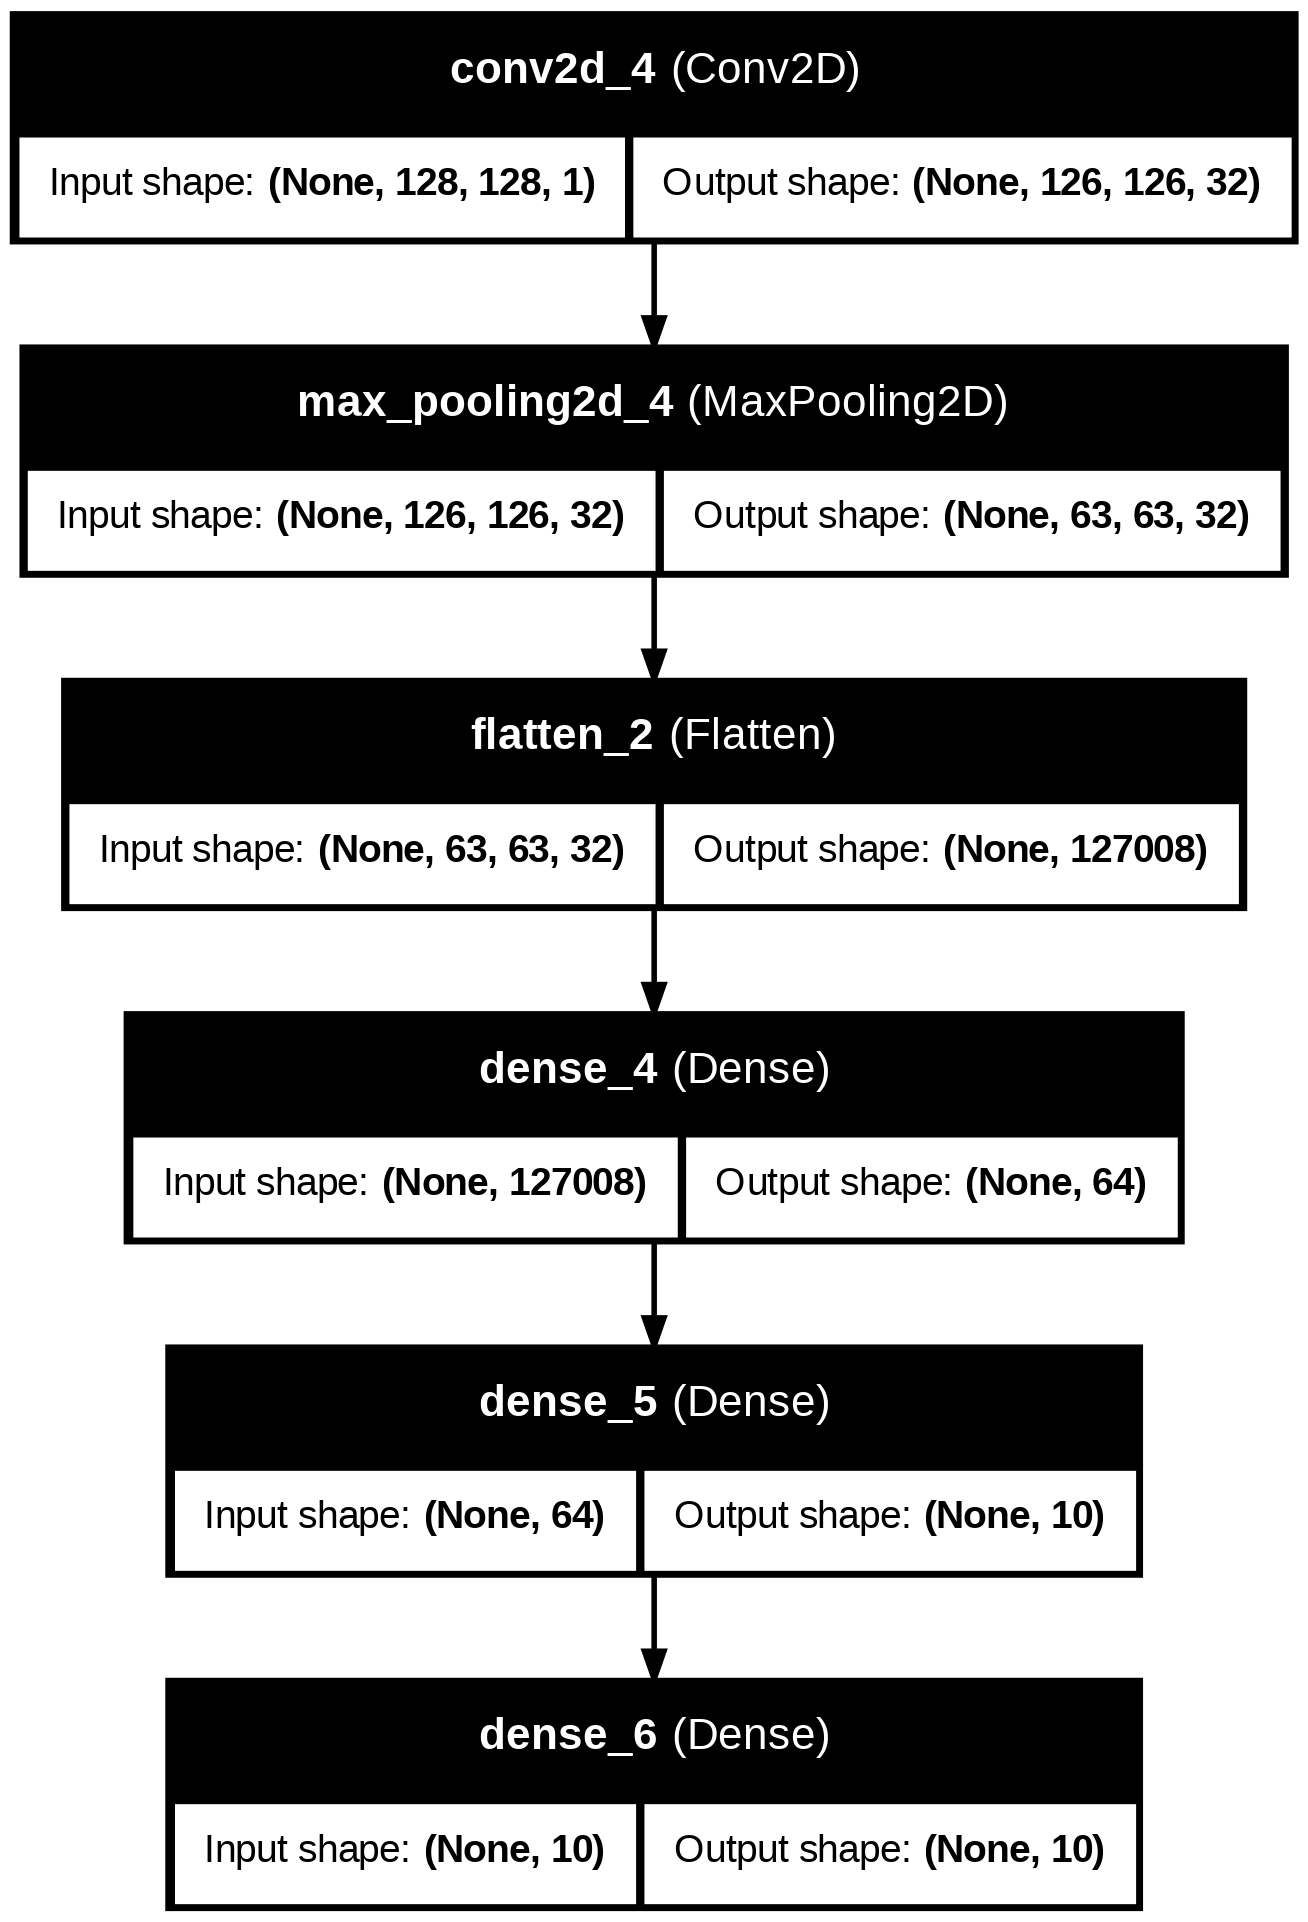

In [ ]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(model, to_file='cnn_model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.save('best_model.keras')